In [58]:
import pandas as pd
import random
import os

In [10]:
# import pandas as pd
# import os

# path = "./GEO Samples/GSE106817/ShortSamples"
# files = [file for file in os.listdir(path)]
# #all_data = pd.DataFrame()
# Samples = []

# for file in files:
#     current_data = pd.read_csv(path+"/"+file, delimiter='\t' ,  encoding = "ISO-8859-1")
#     #all_data = pd.concat([all_data,current_data])
#     Samples.append(current_data)

In [1]:
# Print iterations progress
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

In [2]:
#read Meta Data


metaPath = r"./GEO Samples/GSE106817/GSE106817_Metadata.xlsx"
metaData = pd.read_excel(metaPath)

In [34]:
#make DataFrame for Cancer Samples

#Mask Ovarian Cancer Samples from MetaData file
df = metaData

cond1 = df['Title'].str.contains("Ovarian Cancer")
cond2 = df['Title'].str.contains("Borderline Ovarian Tumor")

mask = cond1 | cond2
ovMetaData = df.loc[mask]

ovMetaData

,Accession,Title,Source name,Characteristics,tumor stage,Age
3417,GSM2854126,Borderline Ovarian Tumor OV0003,Serum,tumor stage (figo):,1C,32
3418,GSM2854127,Borderline Ovarian Tumor OV0015,Serum,tumor stage (figo):,1C,77
3419,GSM2854128,Borderline Ovarian Tumor OV0017,Serum,tumor stage (figo):,1A,47
3420,GSM2854129,Borderline Ovarian Tumor OV0027,Serum,tumor stage (figo):,1C,40
3421,GSM2854130,Borderline Ovarian Tumor OV0039,Serum,tumor stage (figo):,1C,49
...,...,...,...,...,...,...
3798,GSM2854507,Ovarian Cancer OV0433,Serum,tumor stage (figo):,1A,38
3799,GSM2854508,Ovarian Cancer OV0436,Serum,tumor stage (figo):,3C,59
3800,GSM2854509,Ovarian Cancer OV0439,Serum,tumor stage (figo):,1C,54
3801,GSM2854510,Ovarian Cancer OV0440,Serum,tumor stage (figo):,3B,62


In [35]:


#list Sample file names need to be read
sampleFiles = []
for i in range (0,ovMetaData.shape[0]):
    sf = (ovMetaData.iloc[i]['Accession'])
    sampleFiles.append(sf)

#Read Sample Files    
samplePath = "./GEO Samples/GSE106817/Samples"
sampleFiles = os.listdir(samplePath)

for i in range(len(sampleFiles)):
    sampleFiles[i] = sampleFiles[i].replace(".txt", "")
    


In [36]:

firstSample = sampleFiles[0]
# firstSample = shortSamples[0]

df = pd.read_csv(samplePath+"/"+firstSample+".txt", delimiter='\t' ,  encoding = "ISO-8859-1")

#make DataFram
df = df.transpose()
header_row = df.iloc[0]
#make the first row as columns names
ov_samples = pd.DataFrame(df.values[1:], columns= header_row)

# Add Columns from MetaData

ov_samples.insert(0,"Accession", [1], True)
ov_samples.insert(1,"tumor stage", [0], True)
ov_samples.insert(1,"Title", ["X"], True)
ov_samples.insert(1,"Age", ["X"], True)
# Add Lable Column
#Because these are Cancerous, so the lable is True, or 1
ov_samples.insert(1,"HasCancer", [1], True)

#remove the extra first row
ov_samples = ov_samples.drop(0)





ov_samples

ID_REF,Accession,HasCancer,Age,Title,tumor stage,MIMAT0004502,MIMAT0004501,MIMAT0002844,MIMAT0002843,MIMAT0002824,...,MIMAT0022965,MIMAT0022948,MIMAT0027678,MIMAT0027677,MIMAT0027662,MIMAT0027661,MIMAT0027646,MIMAT0027645,MIMAT0027630,MIMAT0027629


In [15]:
#Read Short Sample Files    


# samplePath = "./GEO Samples/GSE106817/ShortSamples"
# sampleFiles = os.listdir(samplePath)

# for i in range(len(sampleFiles)):
#     sampleFiles[i] = sampleFiles[i].replace(".txt", "")
    

# sampleFiles

['GSM2854354',
 'GSM2854355',
 'GSM2854356',
 'GSM2854357',
 'GSM2854358',
 'GSM2854359']

In [52]:
ovMetaData

,Accession,Title,Source name,Characteristics,tumor stage,Age
3417,GSM2854126,Borderline Ovarian Tumor OV0003,Serum,tumor stage (figo):,1C,32
3418,GSM2854127,Borderline Ovarian Tumor OV0015,Serum,tumor stage (figo):,1C,77
3419,GSM2854128,Borderline Ovarian Tumor OV0017,Serum,tumor stage (figo):,1A,47
3420,GSM2854129,Borderline Ovarian Tumor OV0027,Serum,tumor stage (figo):,1C,40
3421,GSM2854130,Borderline Ovarian Tumor OV0039,Serum,tumor stage (figo):,1C,49
...,...,...,...,...,...,...
3798,GSM2854507,Ovarian Cancer OV0433,Serum,tumor stage (figo):,1A,38
3799,GSM2854508,Ovarian Cancer OV0436,Serum,tumor stage (figo):,3C,59
3800,GSM2854509,Ovarian Cancer OV0439,Serum,tumor stage (figo):,1C,54
3801,GSM2854510,Ovarian Cancer OV0440,Serum,tumor stage (figo):,3B,62


In [55]:
# clear datafram
ov_samples.drop(ov_samples.index, inplace=True)


#read sample files
l = len(ovMetaData)

for i in range (l):
    sf = (ovMetaData.iloc[i]['Accession'])    
#     sf = sampleFiles[i]
    df = pd.read_csv(samplePath+"/"+sf+".txt", delimiter='\t' ,  encoding = "ISO-8859-1")
    df = df.transpose()
    
    new_df = pd.DataFrame(df.values[1:], columns=header_row) 
    
    # Set added columns    
    stage = ovMetaData.loc[ovMetaData["Accession"] == sf]["tumor stage"].item()
    
    #if this sample doesn't have any label, skip it
    if stage == 'XX':
        continue
        
    new_df["Accession"] = sf      
    new_df["HasCancer"] = 1    
    new_df["tumor stage"] = stage
    new_df["Age"] = ovMetaData.loc[ovMetaData["Accession"] == sf]["Age"].item() 
    new_df["Title"] = ovMetaData.loc[ovMetaData["Accession"] == sf]["Title"].item()
 
    ov_samples = ov_samples.append(new_df, ignore_index=True)
  
    
    # print progress bar
    printProgressBar(i + 1, l, prefix = 'Progress:', suffix = 'Complete', length = 50)    
    

print
ov_samples

Progress: |██████████████████████████████████████████████████| 100.0% Complete


,Accession,HasCancer,Age,Title,tumor stage,MIMAT0004502,MIMAT0004501,MIMAT0002844,MIMAT0002843,MIMAT0002824,...,MIMAT0022965,MIMAT0022948,MIMAT0027678,MIMAT0027677,MIMAT0027662,MIMAT0027661,MIMAT0027646,MIMAT0027645,MIMAT0027630,MIMAT0027629
0,GSM2854126,1,32,Borderline Ovarian Tumor OV0003,1C,2.694,5.158,4.682,0.392,5.369,...,0.392,4.622,7.006,0.392,0.392,5.869,0.392,2.131,0.392,0.392
1,GSM2854127,1,77,Borderline Ovarian Tumor OV0015,1C,7.712,3.6,6.827,5.691,6.543,...,1.741,5.343,4.71,1.741,1.741,7.167,1.741,4.361,5.245,2.348
2,GSM2854128,1,47,Borderline Ovarian Tumor OV0017,1A,1.855,3.536,1.855,4.097,5.304,...,1.855,6.519,6.466,4.897,1.855,6.14,1.855,5.966,4.492,1.855
3,GSM2854129,1,40,Borderline Ovarian Tumor OV0027,1C,1.883,4.796,3.816,0.696,6.792,...,0.696,0.696,5.614,0.696,0.696,0.696,0.696,3.869,4.449,2.133
4,GSM2854130,1,49,Borderline Ovarian Tumor OV0039,1C,3.722,5.589,3.693,0.538,6.376,...,0.538,6.34,5.818,5.064,0.538,6.477,0.538,5.834,4.891,4.392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,GSM2854507,1,38,Ovarian Cancer OV0433,1A,3.827,2.624,4.849,3.624,6.671,...,-0.984,6.772,6.633,4.152,-0.984,6.564,-0.984,5.962,6.359,5.736
314,GSM2854508,1,59,Ovarian Cancer OV0436,3C,-1.409,-1.409,2.666,3.942,6.265,...,-1.409,6.235,6.937,-1.409,-0.161,6.413,2.294,5.936,5.515,4.618
315,GSM2854509,1,54,Ovarian Cancer OV0439,1C,3.897,0.154,5.678,0.154,5.827,...,0.154,7.251,6.055,0.154,0.154,6.71,0.154,5.379,2.613,5.485
316,GSM2854510,1,62,Ovarian Cancer OV0440,3B,-0.35,-0.35,3.099,-0.35,6.912,...,-0.35,6.889,6.88,-0.35,2.085,5.954,-0.35,6.033,6.243,4.745


In [62]:

#Mask Non_Cancer Samples from MetaData file
df = metaData
mask= df['Title'].str.contains("non-Cancer")
nonCancerMetaData = df.loc[mask]
#2759 Samples
#print(nonCancerMetaData)

#list Sample file names need to be read
sampleFiles = []
l = nonCancerMetaData.shape[0]


#take the size of OVsamples from None_Cancer samples

# random_list = random.sample(range(start, end + 1), count)
random_list = random.sample(range(0, l + 1), len(ov_samples))

for i in range (len(ov_samples)):
    sf = (nonCancerMetaData.iloc[random_list[i]]['Accession'])
    sampleFiles.append(sf)


In [61]:
#Read Sample Files    
samplePath = "./GEO Samples/GSE106817/Samples"
firstSample = sampleFiles[0]
df = pd.read_csv(samplePath+"/"+firstSample+".txt", delimiter='\t' ,  encoding = "ISO-8859-1")

#make DataFram
df = df.transpose()
header_row = df.iloc[0]
#make the first row as columns names
nc_samples = pd.DataFrame(df.values[1:], columns= header_row)

# Add Columns from MetaData

nc_samples.insert(0,"Accession", [1], True)
nc_samples.insert(1,"tumor stage", [0], True)
nc_samples.insert(1,"Title", ["X"], True)
nc_samples.insert(1,"Age", ["X"], True)
# Add Lable Column
#Because these are Cancerous, so the lable is True, or 1
nc_samples.insert(1,"HasCancer", [0], True)

nc_samples

ID_REF,Accession,HasCancer,Age,Title,tumor stage,MIMAT0004502,MIMAT0004501,MIMAT0002844,MIMAT0002843,MIMAT0002824,...,MIMAT0022965,MIMAT0022948,MIMAT0027678,MIMAT0027677,MIMAT0027662,MIMAT0027661,MIMAT0027646,MIMAT0027645,MIMAT0027630,MIMAT0027629
0,1,0,X,X,0,-4.74,-0.206,2.538,0.311,5.516,...,-4.74,5.269,7.989,-4.74,3.49,5.356,1.275,4.497,4.793,1.667


In [63]:
# clear datafram
nc_samples.drop(nc_samples.index, inplace=True)


#read sample files
l = len(sampleFiles)
for i in range (l):
    filename = sampleFiles[i]
    df = pd.read_csv(samplePath+"/"+filename+".txt", delimiter='\t' ,  encoding = "ISO-8859-1")
    df = df.transpose()
    new_df = pd.DataFrame(df.values[1:], columns=header_row)
    # Set added columns
    new_df["Accession"] = filename      
    new_df["HasCancer"] = 0    
    new_df["tumor stage"] = 0
    new_df["Title"] = nonCancerMetaData.loc[nonCancerMetaData["Accession"] == filename]["Title"].item()
    new_df["Age"] = nonCancerMetaData.loc[nonCancerMetaData["Accession"] == filename]["Age"].item()

    nc_samples = nc_samples.append(new_df, ignore_index=True)

    # print progress bar
    printProgressBar(i + 1, l, prefix = 'Progress:', suffix = 'Complete', length = 50) 

# Add Lable Column

nc_samples

Progress: |██████████████████████████████████████████████████| 100.0% Complete


,Accession,HasCancer,Age,Title,tumor stage,MIMAT0004502,MIMAT0004501,MIMAT0002844,MIMAT0002843,MIMAT0002824,...,MIMAT0022965,MIMAT0022948,MIMAT0027678,MIMAT0027677,MIMAT0027662,MIMAT0027661,MIMAT0027646,MIMAT0027645,MIMAT0027630,MIMAT0027629
0,GSM2853043,0,uncertain,non-Cancer M11110804,0,1.546,0.007,4.077,3.443,5.747,...,-2.338,5.095,7.854,-2.338,2.161,5.046,-0.095,4.427,4.398,-2.338
1,GSM2851395,0,uncertain,non-Cancer XA0058,0,2.332,-5.671,2.389,-5.671,5.034,...,-5.671,4.969,7.916,-5.671,2.923,5.432,-0.032,4.679,4.764,1.031
2,GSM2852553,0,uncertain,non-Cancer CHC791,0,1.374,1.454,2.817,-0.296,6.034,...,-3.357,6.525,7.954,-3.357,-3.357,5.726,-3.357,4.594,4.199,2.732
3,GSM2853100,0,uncertain,non-Cancer M12010403,0,2.585,2.362,3.828,2.637,5.644,...,-4.006,4.822,7.348,-4.006,2.895,5.114,0.878,4.113,4.178,-1.505
4,GSM2853931,0,uncertain,non-Cancer NB14021002,0,-4.186,-4.186,2.433,-4.186,5.823,...,-4.186,5.683,8.246,-4.186,3.382,5.521,1.909,4.503,4.612,0.732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,GSM2851855,0,uncertain,non-Cancer XA0541,0,0.087,-4.588,2.824,-4.588,5.649,...,-4.588,5.543,7.362,-4.588,2.288,5.202,0.286,4.6,3.704,-4.588
314,GSM2853621,0,uncertain,non-Cancer NB13060301,0,1.682,-3.461,2.097,1.153,5.588,...,-3.461,5.657,8.322,-3.461,3.582,5.338,2.645,4.778,4.943,1.574
315,GSM2853079,0,uncertain,non-Cancer M11120904,0,-3.597,-3.3,2.085,-3.597,5.233,...,-2.765,5.582,7.668,-3.597,2.955,5.23,1.412,4.431,4.348,-0.654
316,GSM2853407,0,uncertain,non-Cancer NB12082303,0,-4.574,-4.574,0.864,-4.574,5.47,...,-4.574,5.709,7.922,-4.574,3.498,5.365,2.29,4.514,4.895,-4.574


In [65]:
all_samples = ov_samples.append(nc_samples, ignore_index=True)
filepath = "./GEO Samples/GSE106817/Dataframe.csv"
all_samples.to_csv(filepath, index=False)

In [67]:
ov_min_each = ov_samples.min()[4:]
ov_max_each = ov_samples.max()[4:]
ov_range = pd.DataFrame({'min': ov_samples.min()[4:], 'max': ov_samples.max()[4:]})

# print(ov_min_each)
# print(ov_max_each)
print(ov_range.shape)

ov_min_all = ov_min_each[4:].min()
# print("\n-------\nOV_min all ", ov_min_all)

ov_range

(2565, 2)


,min,max
MIMAT0004502,-3.928,9.703
MIMAT0004501,-2.48,7.355
MIMAT0002844,-1.997,8.234
MIMAT0002843,-2.48,7.247
MIMAT0002824,0.266,8.393
...,...,...
MIMAT0027661,0.696,8.626
MIMAT0027646,-2.48,8.389
MIMAT0027645,0.965,8.599
MIMAT0027630,-0.746,8.644


In [225]:
nc_min_each = nc_samples.min()
# print(nc_min_each)
nc_min_all = nc_min_each[3:].min()
nc_range = pd.DataFrame({'min': nc_samples.min()[4:], 'max': nc_samples.max()[4:]})
print(nc_range.shape)
nc_range

(2565, 2)


,min,max
MIMAT0004502,-6.327,9.093
MIMAT0004501,-6.327,8.849
MIMAT0002844,-5.068,8.271
MIMAT0002843,-6.327,7.769
MIMAT0002824,0.609,9.594
...,...,...
MIMAT0027661,-0.365,8.039
MIMAT0027646,-5.082,8.192
MIMAT0027645,-3.217,8.297
MIMAT0027630,-3.749,8.409


In [161]:
ov_mean_each = ov_samples.mean()[1:]
ov_mean_each

MIMAT0004502    2.209833
MIMAT0004501    1.999097
MIMAT0002844    3.249937
MIMAT0002843    1.704399
MIMAT0002824    6.111160
                  ...   
MIMAT0027661    6.184283
MIMAT0027646    1.109415
MIMAT0027645    5.783645
MIMAT0027630    4.908088
MIMAT0027629    2.649119
Length: 2565, dtype: float64

In [160]:
nc_mean_each = nc_samples.mean()[2:]
nc_mean_each

MIMAT0004502    0.005405
MIMAT0004501   -0.476117
MIMAT0002844    2.486776
MIMAT0002843   -0.109662
MIMAT0002824    5.696163
                  ...   
MIMAT0027661    5.476807
MIMAT0027646   -0.158851
MIMAT0027645    4.753222
MIMAT0027630    4.135583
MIMAT0027629   -0.146581
Length: 2565, dtype: float64

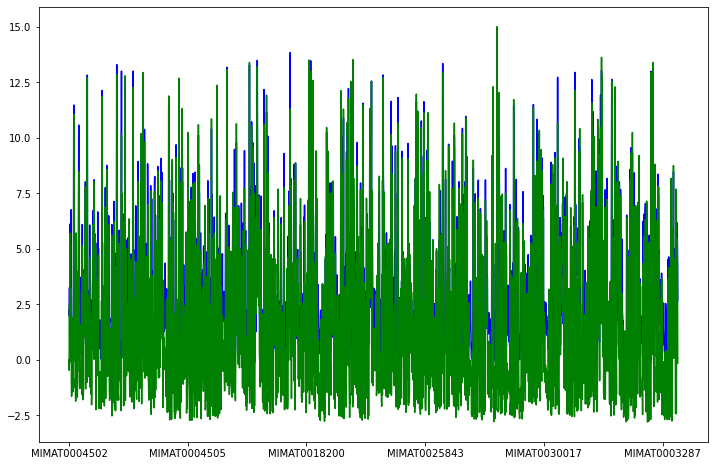

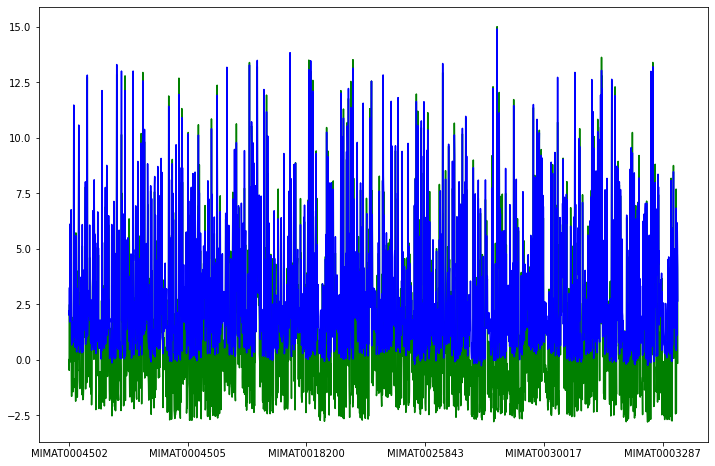

In [175]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
ov_mean_each.plot(color="blue")
nc_mean_each.plot(color="green")
plt.show()


plt.figure(figsize=(12,8))
nc_mean_each.plot(color="green")
ov_mean_each.plot(color="blue")
plt.show()

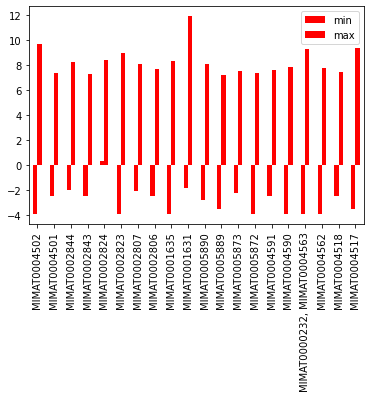

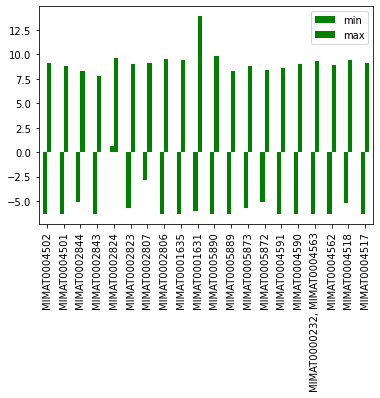

In [226]:
import pandas as pd
import matplotlib.pyplot as plt

ov_range[:20].plot(kind='bar', color = "red")
nc_range[:20].plot(kind='bar', color="green")
# plt.xticks(rotation=0)
plt.show()


# plt.figure(figsize=(12,8))
# ov_range.plot(color="blue")
# nc_range.plot(color="green")
# plt.show()


# plt.figure(figsize=(12,8))
# nc_range.plot(color="green")
# ov_range.plot(color="blue")
# plt.show()

In [235]:
# Plotting
plt.figure(figsize=(10, 6))
for col in df.columns[:20]:
    plt.bar(col, height=ov_range[1][col]-ov_range[0][col], bottom=ov_range[0][col])

plt.title('Range of Values for Each Column')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.xticks(rotation=0)
plt.show()


KeyError: 1

<Figure size 720x432 with 0 Axes>

In [222]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"  # Specify the GPU device index, e.g., "0" for the first GPU


In [194]:
data_top = all_samples.columns
data_top

Index(['Accession', 'HasCancer', 'Title', 'tumor stage', 'MIMAT0004502',
       'MIMAT0004501', 'MIMAT0002844', 'MIMAT0002843', 'MIMAT0002824',
       'MIMAT0002823',
       ...
       'MIMAT0022965', 'MIMAT0022948', 'MIMAT0027678', 'MIMAT0027677',
       'MIMAT0027662', 'MIMAT0027661', 'MIMAT0027646', 'MIMAT0027645',
       'MIMAT0027630', 'MIMAT0027629'],
      dtype='object', length=2569)

In [65]:
minval = all_samples.min()
mm = minval.min()
df = all_samples + (-mm)
df /= 23.385

mm

-6.021

In [71]:
import pandas as pd
from sklearn.decomposition import NMF

X = df.iloc[:, :-1]

nmf = NMF(n_components=10)
nmf.max_iter = 12000
X_new = nmf.fit_transform(X)

In [74]:
# Create a dataframe from the reduced features with the feature names as column names
df_new = pd.DataFrame(data=X_new, columns=feature_names)

# Get the names of the 10 reduced features
reduced_feature_names = df_new.columns.tolist()
print("Reduced feature names:", reduced_feature_names)

Reduced feature names: ['NMF 1', 'NMF 2', 'NMF 3', 'NMF 4', 'NMF 5', 'NMF 6', 'NMF 7', 'NMF 8', 'NMF 9', 'NMF 10']


In [79]:
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.feature_selection import SelectKBest, chi2

# Load the dataframe from the csv file
#df = all_samples

# Split the data into features (X) and target (y)
X = df.iloc[:, :-1] # assuming the last column is the target column
y = df.iloc[:, -1]

# Select the top 300 features using chi2 test
#selector = SelectKBest(chi2, k=300)
#X_selected = selector.fit_transform(X, y)

# Reduce the number of features to 30 using NMF
nmf = NMF(n_components=30)
nmf.max_iter = 12000
X_new = nmf.fit_transform(X)


In [81]:
feature_names=X.columns[nmf.components_.argmax(axis=1)]
feature_names

Index(['MIMAT0019337', 'MIMAT0016883', 'MIMAT0019337', 'MIMAT0018073',
       'MIMAT0019074', 'MIMAT0004975', 'MIMAT0004770', 'MIMAT0019741',
       'MIMAT0001631', 'MIMAT0022497', 'MIMAT0002823', 'MIMAT0019750',
       'MIMAT0003325', 'MIMAT0004505', 'MIMAT0027403', 'MIMAT0027502',
       'MIMAT0005880', 'MIMAT0005898', 'MIMAT0019210', 'MIMAT0002856',
       'MIMAT0030428', 'MIMAT0019896', 'MIMAT0019690', 'MIMAT0004592',
       'MIMAT0019071', 'MIMAT0001636', 'MIMAT0002859', 'MIMAT0019751',
       'MIMAT0003311', 'MIMAT0019337'],
      dtype='object', name='ID_REF')

In [ ]:

# Get the names of the top 30 features
mask = selector.get_support()
feature_names = X.columns[mask][nmf.components_.argmax(axis=1)].tolist()
print("Top 30 feature names:", feature_names)


In [10]:
import pandas as pd
from sklearn.decomposition import PCA

df = all_samples

pca = PCA(n_components=10)
# Split the data into features (X)
X = df.iloc[:, :-1] # assuming the last column is the target column

# Reduce the number of features to 30 using PCA
pca = PCA(n_components=30)
X_new = pca.fit_transform(X)

In [45]:
pca.explained_variance_ratio_

array([0.29577822, 0.04869341, 0.03333378, 0.01675   , 0.01449951,
       0.01220008, 0.01161551, 0.00785954, 0.00729409, 0.00640559,
       0.00567038, 0.00490737, 0.00473793, 0.00435978, 0.00422606,
       0.00354322, 0.00341824, 0.00324396, 0.00309451, 0.00295897,
       0.00272169, 0.00263875, 0.00246628, 0.00244088, 0.00232905,
       0.00224019, 0.00220667, 0.00218433, 0.00208231, 0.00205913])

In [41]:
pca.components_

array([[-0.01763729, -0.01717338, -0.01690535, ...,  0.03913158,
         0.03933344,  0.05210114],
       [-0.04000759, -0.03783146, -0.0367466 , ...,  0.05412543,
         0.0543311 ,  0.05558828],
       [-0.0514631 , -0.05115021, -0.05025662, ...,  0.04624201,
         0.04752091,  0.04770056],
       ...,
       [-0.08391915, -0.08249566, -0.07439446, ...,  0.07004941,
         0.08303022,  0.08312663],
       [-0.06886883, -0.06700816, -0.06696811, ...,  0.07601362,
         0.07776719,  0.09061917],
       [-0.07925443, -0.07359579, -0.07141032, ...,  0.06612155,
         0.06623082,  0.08431802]])

In [46]:
top_30_features = [df.columns[i] for i in pca.components_.argsort()[:1, :30]][0]
top_30_features

Index(['MIMAT0004502', 'MIMAT0004501', 'MIMAT0002844', 'MIMAT0002843',
       'MIMAT0002824', 'MIMAT0002823', 'MIMAT0002807', 'MIMAT0002806',
       'MIMAT0001635', 'MIMAT0001631', 'MIMAT0005890', 'MIMAT0005889',
       'MIMAT0005873', 'MIMAT0005872', 'MIMAT0004591', 'MIMAT0004590',
       'MIMAT0000232, MIMAT0004563', 'MIMAT0004562', 'MIMAT0004518',
       'MIMAT0004517', 'MIMAT0016907', 'MIMAT0016901', 'MIMAT0014994',
       'MIMAT0016913', 'MIMAT0011777', 'MIMAT0011775', 'MIMAT0005924',
       'MIMAT0005923', 'MIMAT0005906', 'MIMAT0005905'],
      dtype='object', name='ID_REF')

In [32]:
top_30_features = [df.columns[i] for i in pca.components_.argsort()[:3, :3]]
#top_30_features = [df.columns[i] for i in pca.components_.argsort()[:, :30]][0]
top_30_features

[Index(['MIMAT0004602', 'MIMAT0027614', 'MIMAT0019710'], dtype='object', name='ID_REF'),
 Index(['MIMAT0005880', 'MIMAT0014987', 'MIMAT0005895'], dtype='object', name='ID_REF'),
 Index(['MIMAT0016858', 'MIMAT0027373', 'MIMAT0000417'], dtype='object', name='ID_REF')]

In [19]:
from Bio import Entrez
from Bio import SeqIO

Entrez.email = "zsaghaie@uncc.edu"  # Replace with your email address

# Function to convert GeneID to gene symbol
def convert_geneid_to_symbol(gene_id):
    handle = Entrez.efetch(db="gene", id=gene_id, retmode="xml")
    record = Entrez.read(handle, validate=False)
    
    print(record)
    
    
    if  'Gene-ref_syn' in (record[0]["Entrezgene_gene"]["Gene-ref"].keys()):
        return (record[0]["Entrezgene_gene"]["Gene-ref"]["Gene-ref_syn"])
    else:
        return (record[0]["Entrezgene_gene"]["Gene-ref"]["Gene-ref_desc"])
    
    
    #symbol = record[0]["Entrezgene_gene"][0]["Gene-ref"]["Symbol"]
    #return symbol

gene_id = "MIMAT0004602"  # Replace with your GeneID
gene_symbol = convert_geneid_to_symbol(gene_id)
print("GeneID", gene_id, "corresponds to gene symbol", gene_symbol)
   
    
# Example usage



[{'Entrezgene_track-info': {'Gene-track': {'Gene-track_geneid': '4602', 'Gene-track_status': StringElement('0', attributes={'value': 'live'}), 'Gene-track_create-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '1998', 'Date-std_month': '8', 'Date-std_day': '20'}}}}, 'Gene-track_update-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2023', 'Date-std_month': '2', 'Date-std_day': '7'}}}}}}, 'Entrezgene_type': StringElement('6', attributes={'value': 'protein-coding'}), 'Entrezgene_source': {'BioSource': {'BioSource_genome': StringElement('1', attributes={'value': 'genomic'}), 'BioSource_origin': StringElement('1', attributes={'value': 'natural'}), 'BioSource_org': {'Org-ref': {'Org-ref_taxname': 'Homo sapiens', 'Org-ref_common': 'human', 'Org-ref_db': [{'Dbtag_db': 'taxon', 'Dbtag_tag': {'Object-id': {'Object-id_id': '9606'}}}], 'Org-ref_orgname': {'OrgName': {'OrgName_name': {'OrgName_name_binomial': {'BinomialOrgName': {'BinomialOrgName_genus': 'Homo', 'BinomialO

In [17]:
for gene_id in top_30_features:
    #gene_id = "MIMAT0022940"  # Replace with your GeneID
    gene_symbol = convert_geneid_to_symbol(gene_id)
    print("GeneID", gene_id, "corresponds to gene symbol", gene_symbol)

    

[{'Entrezgene_track-info': {'Gene-track': {'Gene-track_geneid': '4602', 'Gene-track_status': StringElement('0', attributes={'value': 'live'}), 'Gene-track_create-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '1998', 'Date-std_month': '8', 'Date-std_day': '20'}}}}, 'Gene-track_update-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2023', 'Date-std_month': '2', 'Date-std_day': '7'}}}}}}, 'Entrezgene_type': StringElement('6', attributes={'value': 'protein-coding'}), 'Entrezgene_source': {'BioSource': {'BioSource_genome': StringElement('1', attributes={'value': 'genomic'}), 'BioSource_origin': StringElement('1', attributes={'value': 'natural'}), 'BioSource_org': {'Org-ref': {'Org-ref_taxname': 'Homo sapiens', 'Org-ref_common': 'human', 'Org-ref_db': [{'Dbtag_db': 'taxon', 'Dbtag_tag': {'Object-id': {'Object-id_id': '9606'}}}], 'Org-ref_orgname': {'OrgName': {'OrgName_name': {'OrgName_name_binomial': {'BinomialOrgName': {'BinomialOrgName_genus': 'Homo', 'BinomialO

[{'Entrezgene_track-info': {'Gene-track': {'Gene-track_geneid': '27614', 'Gene-track_status': StringElement('0', attributes={'value': 'live'}), 'Gene-track_create-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2000', 'Date-std_month': '2', 'Date-std_day': '1'}}}}, 'Gene-track_update-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2017', 'Date-std_month': '4', 'Date-std_day': '8'}}}}}}, 'Entrezgene_type': StringElement('0', attributes={'value': 'unknown'}), 'Entrezgene_source': {'BioSource': {'BioSource_genome': StringElement('1', attributes={'value': 'genomic'}), 'BioSource_origin': StringElement('1', attributes={'value': 'natural'}), 'BioSource_org': {'Org-ref': {'Org-ref_taxname': 'Mus musculus', 'Org-ref_common': 'house mouse', 'Org-ref_db': [{'Dbtag_db': 'taxon', 'Dbtag_tag': {'Object-id': {'Object-id_id': '10090'}}}], 'Org-ref_orgname': {'OrgName': {'OrgName_name': {'OrgName_name_binomial': {'BinomialOrgName': {'BinomialOrgName_genus': 'Mus', 'BinomialOr

[{'Entrezgene_track-info': {'Gene-track': {'Gene-track_geneid': '3240', 'Gene-track_status': StringElement('0', attributes={'value': 'live'}), 'Gene-track_create-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '1991', 'Date-std_month': '1', 'Date-std_day': '15'}}}}, 'Gene-track_update-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2023', 'Date-std_month': '2', 'Date-std_day': '12'}}}}}}, 'Entrezgene_type': StringElement('6', attributes={'value': 'protein-coding'}), 'Entrezgene_source': {'BioSource': {'BioSource_genome': StringElement('1', attributes={'value': 'genomic'}), 'BioSource_origin': StringElement('1', attributes={'value': 'natural'}), 'BioSource_org': {'Org-ref': {'Org-ref_taxname': 'Homo sapiens', 'Org-ref_common': 'human', 'Org-ref_db': [{'Dbtag_db': 'taxon', 'Dbtag_tag': {'Object-id': {'Object-id_id': '9606'}}}], 'Org-ref_orgname': {'OrgName': {'OrgName_name': {'OrgName_name_binomial': {'BinomialOrgName': {'BinomialOrgName_genus': 'Homo', 'Binomial

[{'Entrezgene_track-info': {'Gene-track': {'Gene-track_geneid': '4592', 'Gene-track_status': StringElement('1', attributes={'value': 'secondary'}), 'Gene-track_current-id': [{'Dbtag_db': 'LocusID', 'Dbtag_tag': {'Object-id': {'Object-id_id': '3662'}}}, {'Dbtag_db': 'GeneID', 'Dbtag_tag': {'Object-id': {'Object-id_id': '3662'}}}], 'Gene-track_create-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '1998', 'Date-std_month': '8', 'Date-std_day': '27'}}}}, 'Gene-track_update-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2017', 'Date-std_month': '4', 'Date-std_day': '8'}}}}, 'Gene-track_discontinue-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2005', 'Date-std_month': '5', 'Date-std_day': '10', 'Date-std_hour': '10', 'Date-std_minute': '5', 'Date-std_second': '0'}}}}}}, 'Entrezgene_type': StringElement('6', attributes={'value': 'protein-coding'}), 'Entrezgene_source': {'BioSource': {'BioSource_genome': StringElement('1', attributes={'value': 'genomic

[{'Entrezgene_track-info': {'Gene-track': {'Gene-track_geneid': '4508', 'Gene-track_create-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2003', 'Date-std_month': '8', 'Date-std_day': '5', 'Date-std_hour': '19', 'Date-std_minute': '51', 'Date-std_second': '0'}}}}, 'Gene-track_update-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2022', 'Date-std_month': '12', 'Date-std_day': '8', 'Date-std_hour': '16', 'Date-std_minute': '41', 'Date-std_second': '0'}}}}}}, 'Entrezgene_type': StringElement('6', attributes={'value': 'protein-coding'}), 'Entrezgene_source': {'BioSource': {'BioSource_genome': StringElement('5', attributes={'value': 'mitochondrion'}), 'BioSource_org': {'Org-ref': {'Org-ref_taxname': 'Homo sapiens', 'Org-ref_common': 'human', 'Org-ref_db': [{'Dbtag_db': 'taxon', 'Dbtag_tag': {'Object-id': {'Object-id_id': '9606'}}}], 'Org-ref_orgname': {'OrgName': {'OrgName_name': {'OrgName_name_binomial': {'BinomialOrgName': {'BinomialOrgName_genus': 'Homo', 'Bin

[{'Entrezgene_track-info': {'Gene-track': {'Gene-track_geneid': '5866', 'Gene-track_status': StringElement('0', attributes={'value': 'live'}), 'Gene-track_create-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2000', 'Date-std_month': '3', 'Date-std_day': '5'}}}}, 'Gene-track_update-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2023', 'Date-std_month': '2', 'Date-std_day': '5', 'Date-std_hour': '11', 'Date-std_minute': '39', 'Date-std_second': '0'}}}}}}, 'Entrezgene_type': StringElement('6', attributes={'value': 'protein-coding'}), 'Entrezgene_source': {'BioSource': {'BioSource_genome': StringElement('1', attributes={'value': 'genomic'}), 'BioSource_origin': StringElement('1', attributes={'value': 'natural'}), 'BioSource_org': {'Org-ref': {'Org-ref_taxname': 'Homo sapiens', 'Org-ref_common': 'human', 'Org-ref_db': [{'Dbtag_db': 'taxon', 'Dbtag_tag': {'Object-id': {'Object-id_id': '9606'}}}], 'Org-ref_orgname': {'OrgName': {'OrgName_name': {'OrgName_name_bino

[{'Entrezgene_track-info': {'Gene-track': {'Gene-track_geneid': '19852', 'Gene-track_status': StringElement('0', attributes={'value': 'live'}), 'Gene-track_create-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '1999', 'Date-std_month': '9', 'Date-std_day': '19'}}}}, 'Gene-track_update-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2022', 'Date-std_month': '9', 'Date-std_day': '26', 'Date-std_hour': '21', 'Date-std_minute': '1', 'Date-std_second': '0'}}}}}}, 'Entrezgene_type': StringElement('7', attributes={'value': 'pseudo'}), 'Entrezgene_source': {'BioSource': {'BioSource_genome': StringElement('1', attributes={'value': 'genomic'}), 'BioSource_origin': StringElement('1', attributes={'value': 'natural'}), 'BioSource_org': {'Org-ref': {'Org-ref_taxname': 'Mus musculus', 'Org-ref_common': 'house mouse', 'Org-ref_db': [{'Dbtag_db': 'taxon', 'Dbtag_tag': {'Object-id': {'Object-id_id': '10090'}}}], 'Org-ref_orgname': {'OrgName': {'OrgName_name': {'OrgName_name_bin

[{'Entrezgene_track-info': {'Gene-track': {'Gene-track_geneid': '27550', 'Gene-track_status': StringElement('0', attributes={'value': 'live'}), 'Gene-track_create-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2000', 'Date-std_month': '2', 'Date-std_day': '1'}}}}, 'Gene-track_update-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2021', 'Date-std_month': '10', 'Date-std_day': '16'}}}}}}, 'Entrezgene_type': StringElement('0', attributes={'value': 'unknown'}), 'Entrezgene_source': {'BioSource': {'BioSource_genome': StringElement('1', attributes={'value': 'genomic'}), 'BioSource_origin': StringElement('1', attributes={'value': 'natural'}), 'BioSource_org': {'Org-ref': {'Org-ref_taxname': 'Mus musculus', 'Org-ref_common': 'house mouse', 'Org-ref_db': [{'Dbtag_db': 'taxon', 'Dbtag_tag': {'Object-id': {'Object-id_id': '10090'}}}], 'Org-ref_orgname': {'OrgName': {'OrgName_name': {'OrgName_name_binomial': {'BinomialOrgName': {'BinomialOrgName_genus': 'Mus', 'Binomial

[{'Entrezgene_track-info': {'Gene-track': {'Gene-track_geneid': '27468', 'Gene-track_status': StringElement('0', attributes={'value': 'live'}), 'Gene-track_create-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2000', 'Date-std_month': '2', 'Date-std_day': '1'}}}}, 'Gene-track_update-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2017', 'Date-std_month': '4', 'Date-std_day': '8'}}}}}}, 'Entrezgene_type': StringElement('0', attributes={'value': 'unknown'}), 'Entrezgene_source': {'BioSource': {'BioSource_genome': StringElement('1', attributes={'value': 'genomic'}), 'BioSource_origin': StringElement('1', attributes={'value': 'natural'}), 'BioSource_org': {'Org-ref': {'Org-ref_taxname': 'Mus musculus', 'Org-ref_common': 'house mouse', 'Org-ref_db': [{'Dbtag_db': 'taxon', 'Dbtag_tag': {'Object-id': {'Object-id_id': '10090'}}}], 'Org-ref_orgname': {'OrgName': {'OrgName_name': {'OrgName_name_binomial': {'BinomialOrgName': {'BinomialOrgName_genus': 'Mus', 'BinomialOr

[{'Entrezgene_track-info': {'Gene-track': {'Gene-track_geneid': '22717', 'Gene-track_status': StringElement('0', attributes={'value': 'live'}), 'Gene-track_create-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2000', 'Date-std_month': '5', 'Date-std_day': '25'}}}}, 'Gene-track_update-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2023', 'Date-std_month': '1', 'Date-std_day': '5', 'Date-std_hour': '16', 'Date-std_minute': '41', 'Date-std_second': '0'}}}}}}, 'Entrezgene_type': StringElement('6', attributes={'value': 'protein-coding'}), 'Entrezgene_source': {'BioSource': {'BioSource_genome': StringElement('1', attributes={'value': 'genomic'}), 'BioSource_origin': StringElement('1', attributes={'value': 'natural'}), 'BioSource_org': {'Org-ref': {'Org-ref_taxname': 'Mus musculus', 'Org-ref_common': 'house mouse', 'Org-ref_db': [{'Dbtag_db': 'taxon', 'Dbtag_tag': {'Object-id': {'Object-id_id': '10090'}}}], 'Org-ref_orgname': {'OrgName': {'OrgName_name': {'OrgName_

[{'Entrezgene_track-info': {'Gene-track': {'Gene-track_geneid': '25458', 'Gene-track_status': StringElement('0', attributes={'value': 'live'}), 'Gene-track_create-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2000', 'Date-std_month': '2', 'Date-std_day': '20'}}}}, 'Gene-track_update-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2022', 'Date-std_month': '9', 'Date-std_day': '22', 'Date-std_hour': '16', 'Date-std_minute': '41', 'Date-std_second': '0'}}}}}}, 'Entrezgene_type': StringElement('6', attributes={'value': 'protein-coding'}), 'Entrezgene_source': {'BioSource': {'BioSource_genome': StringElement('1', attributes={'value': 'genomic'}), 'BioSource_origin': StringElement('1', attributes={'value': 'natural'}), 'BioSource_org': {'Org-ref': {'Org-ref_taxname': 'Rattus norvegicus', 'Org-ref_common': 'Norway rat', 'Org-ref_db': [{'Dbtag_db': 'taxon', 'Dbtag_tag': {'Object-id': {'Object-id_id': '10116'}}}], 'Org-ref_orgname': {'OrgName': {'OrgName_name': {'Org

[{'Entrezgene_track-info': {'Gene-track': {'Gene-track_geneid': '27477', 'Gene-track_status': StringElement('0', attributes={'value': 'live'}), 'Gene-track_create-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2000', 'Date-std_month': '2', 'Date-std_day': '1'}}}}, 'Gene-track_update-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2017', 'Date-std_month': '4', 'Date-std_day': '8'}}}}}}, 'Entrezgene_type': StringElement('0', attributes={'value': 'unknown'}), 'Entrezgene_source': {'BioSource': {'BioSource_genome': StringElement('1', attributes={'value': 'genomic'}), 'BioSource_origin': StringElement('1', attributes={'value': 'natural'}), 'BioSource_org': {'Org-ref': {'Org-ref_taxname': 'Mus musculus', 'Org-ref_common': 'house mouse', 'Org-ref_db': [{'Dbtag_db': 'taxon', 'Dbtag_tag': {'Object-id': {'Object-id_id': '10090'}}}], 'Org-ref_orgname': {'OrgName': {'OrgName_name': {'OrgName_name_binomial': {'BinomialOrgName': {'BinomialOrgName_genus': 'Mus', 'BinomialOr

[{'Entrezgene_track-info': {'Gene-track': {'Gene-track_geneid': '24610', 'Gene-track_status': StringElement('0', attributes={'value': 'live'}), 'Gene-track_create-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '1999', 'Date-std_month': '11', 'Date-std_day': '7'}}}}, 'Gene-track_update-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2022', 'Date-std_month': '11', 'Date-std_day': '4', 'Date-std_hour': '1', 'Date-std_minute': '48', 'Date-std_second': '1'}}}}}}, 'Entrezgene_type': StringElement('6', attributes={'value': 'protein-coding'}), 'Entrezgene_source': {'BioSource': {'BioSource_genome': StringElement('1', attributes={'value': 'genomic'}), 'BioSource_origin': StringElement('1', attributes={'value': 'natural'}), 'BioSource_org': {'Org-ref': {'Org-ref_taxname': 'Rattus norvegicus', 'Org-ref_common': 'Norway rat', 'Org-ref_db': [{'Dbtag_db': 'taxon', 'Dbtag_tag': {'Object-id': {'Object-id_id': '10116'}}}], 'Org-ref_orgname': {'OrgName': {'OrgName_name': {'OrgN

[{'Entrezgene_track-info': {'Gene-track': {'Gene-track_geneid': '27461', 'Gene-track_status': StringElement('0', attributes={'value': 'live'}), 'Gene-track_create-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2000', 'Date-std_month': '2', 'Date-std_day': '1'}}}}, 'Gene-track_update-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2017', 'Date-std_month': '4', 'Date-std_day': '8'}}}}}}, 'Entrezgene_type': StringElement('0', attributes={'value': 'unknown'}), 'Entrezgene_source': {'BioSource': {'BioSource_genome': StringElement('1', attributes={'value': 'genomic'}), 'BioSource_origin': StringElement('1', attributes={'value': 'natural'}), 'BioSource_org': {'Org-ref': {'Org-ref_taxname': 'Mus musculus', 'Org-ref_common': 'house mouse', 'Org-ref_db': [{'Dbtag_db': 'taxon', 'Dbtag_tag': {'Object-id': {'Object-id_id': '10090'}}}], 'Org-ref_orgname': {'OrgName': {'OrgName_name': {'OrgName_name_binomial': {'BinomialOrgName': {'BinomialOrgName_genus': 'Mus', 'BinomialOr

[{'Entrezgene_track-info': {'Gene-track': {'Gene-track_geneid': '28117', 'Gene-track_status': StringElement('1', attributes={'value': 'secondary'}), 'Gene-track_current-id': [{'Dbtag_db': 'LocusID', 'Dbtag_tag': {'Object-id': {'Object-id_id': '226178'}}}, {'Dbtag_db': 'GeneID', 'Dbtag_tag': {'Object-id': {'Object-id_id': '226178'}}}], 'Gene-track_create-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2000', 'Date-std_month': '2', 'Date-std_day': '1'}}}}, 'Gene-track_update-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2017', 'Date-std_month': '4', 'Date-std_day': '8'}}}}, 'Gene-track_discontinue-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2005', 'Date-std_month': '5', 'Date-std_day': '10', 'Date-std_hour': '10', 'Date-std_minute': '40', 'Date-std_second': '0'}}}}}}, 'Entrezgene_type': StringElement('6', attributes={'value': 'protein-coding'}), 'Entrezgene_source': {'BioSource': {'BioSource_genome': StringElement('1', attributes={'value': 'ge

[{'Entrezgene_track-info': {'Gene-track': {'Gene-track_geneid': '26477', 'Gene-track_status': StringElement('1', attributes={'value': 'secondary'}), 'Gene-track_current-id': [{'Dbtag_db': 'LocusID', 'Dbtag_tag': {'Object-id': {'Object-id_id': '8583'}}}, {'Dbtag_db': 'GeneID', 'Dbtag_tag': {'Object-id': {'Object-id_id': '8583'}}}], 'Gene-track_create-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2000', 'Date-std_month': '12', 'Date-std_day': '31'}}}}, 'Gene-track_update-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2017', 'Date-std_month': '4', 'Date-std_day': '8'}}}}, 'Gene-track_discontinue-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2005', 'Date-std_month': '5', 'Date-std_day': '10', 'Date-std_hour': '10', 'Date-std_minute': '5', 'Date-std_second': '0'}}}}}}, 'Entrezgene_type': StringElement('7', attributes={'value': 'pseudo'}), 'Entrezgene_source': {'BioSource': {'BioSource_genome': StringElement('1', attributes={'value': 'genomic'}), '

[{'Entrezgene_track-info': {'Gene-track': {'Gene-track_geneid': '4951', 'Gene-track_status': StringElement('0', attributes={'value': 'live'}), 'Gene-track_create-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '1992', 'Date-std_month': '4', 'Date-std_day': '20'}}}}, 'Gene-track_update-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2023', 'Date-std_month': '1', 'Date-std_day': '14'}}}}}}, 'Entrezgene_type': StringElement('6', attributes={'value': 'protein-coding'}), 'Entrezgene_source': {'BioSource': {'BioSource_genome': StringElement('1', attributes={'value': 'genomic'}), 'BioSource_origin': StringElement('1', attributes={'value': 'natural'}), 'BioSource_org': {'Org-ref': {'Org-ref_taxname': 'Homo sapiens', 'Org-ref_common': 'human', 'Org-ref_db': [{'Dbtag_db': 'taxon', 'Dbtag_tag': {'Object-id': {'Object-id_id': '9606'}}}], 'Org-ref_orgname': {'OrgName': {'OrgName_name': {'OrgName_name_binomial': {'BinomialOrgName': {'BinomialOrgName_genus': 'Homo', 'Binomial

KeyboardInterrupt: 

In [18]:
print(gene_id[0])

MIMAT0022940


In [21]:
import time
import requests
from bs4 import BeautifulSoup

def get_gene_symbol(gene_id):
    # Use the NCBI Gene ID to retrieve information about the gene
    response = requests.get(f'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=gene&id={gene_id}&retmode=xml')
    time.sleep(1)
    soup = BeautifulSoup(response.text, 'xml')
    gene_symbol = soup.find('Gene-ref').find('Gene-ref_locus').text
    
    return gene_symbol

# Example usage:
#gene_id = 'MIMAT0019221'
#gene_symbol = get_gene_symbol(gene_id)
#print(f'The gene symbol for NCBI Gene ID {gene_id} is {gene_symbol}')


In [82]:
#Data result of NMF

genes = feature_names
for gene_id in genes:
# Example usage:
    #gene_id = 'MIMAT0019221'
    gene_symbol = get_gene_symbol(gene_id)
    print(f'The gene symbol for NCBI Gene ID {gene_id} is {gene_symbol}')

The gene symbol for NCBI Gene ID MIMAT0019337 is Rab33a
The gene symbol for NCBI Gene ID MIMAT0016883 is Lig4
The gene symbol for NCBI Gene ID MIMAT0019337 is Rab33a
The gene symbol for NCBI Gene ID MIMAT0018073 is Nid1
The gene symbol for NCBI Gene ID MIMAT0019074 is Prg2
The gene symbol for NCBI Gene ID MIMAT0004975 is OMP
The gene symbol for NCBI Gene ID MIMAT0004770 is NF1P1
The gene symbol for NCBI Gene ID MIMAT0019741 is Rgv2
The gene symbol for NCBI Gene ID MIMAT0001631 is DCE
The gene symbol for NCBI Gene ID MIMAT0022497 is Xmmv51
The gene symbol for NCBI Gene ID MIMAT0002823 is GPM6A
The gene symbol for NCBI Gene ID MIMAT0019750 is Ri1
The gene symbol for NCBI Gene ID MIMAT0003325 is HSPCAL4


AttributeError: 'NoneType' object has no attribute 'find'

In [47]:
genes = top_30_features
for gene_id in genes:
# Example usage:
    #gene_id = 'MIMAT0019221'
    gene_symbol = get_gene_symbol(gene_id)
    print(f'The gene symbol for NCBI Gene ID {gene_id} is {gene_symbol}')

The gene symbol for NCBI Gene ID MIMAT0004502 is MT2A
The gene symbol for NCBI Gene ID MIMAT0004501 is MT1X
The gene symbol for NCBI Gene ID MIMAT0002844 is GPR21
The gene symbol for NCBI Gene ID MIMAT0002843 is GPR20
The gene symbol for NCBI Gene ID MIMAT0002824 is GPM6B
The gene symbol for NCBI Gene ID MIMAT0002823 is GPM6A
The gene symbol for NCBI Gene ID MIMAT0002807 is GOT2L1
The gene symbol for NCBI Gene ID MIMAT0002806 is GOT2
The gene symbol for NCBI Gene ID MIMAT0001635 is DCTD
The gene symbol for NCBI Gene ID MIMAT0001631 is DCE
The gene symbol for NCBI Gene ID MIMAT0005890 is RAD51B
The gene symbol for NCBI Gene ID MIMAT0005889 is RAD51C
The gene symbol for NCBI Gene ID MIMAT0005873 is RAB27A
The gene symbol for NCBI Gene ID MIMAT0005872 is RAB13
The gene symbol for NCBI Gene ID MIMAT0004591 is TRIM37
The gene symbol for NCBI Gene ID MIMAT0004590 is MUC8
The gene symbol for NCBI Gene ID MIMAT0000232, MIMAT0004563 is ALDRL1


AttributeError: 'NoneType' object has no attribute 'find'

In [56]:
genes = ['MIMAT0003323',
         'MIMAT0004602',
 'MIMAT0005880',
 'MIMAT0016858',
 'MIMAT0005898',
 'MIMAT0000076',
 'MIMAT0022940',
 'MIMAT0005880',
 'MIMAT0003254',
 'MIMAT0027689',
 'MIMAT0016883',
 'MIMAT0019015',
 'MIMAT0027629',
 'MIMAT0019901',
 'MIMAT0027601',
 'MIMAT0004810',
 'MIMAT0005789',
 'MIMAT0021125',
 'MIMAT0004613',
 'MIMAT0025463',
 'MIMAT0019898',
 'MIMAT0002875',
 'MIMAT0027627',
 'MIMAT0018947',
 'MIMAT0016913',
 'MIMAT0003385',
 'MIMAT0005926',
 'MIMAT0004770',
 'MIMAT0010214',
 'MIMAT0004554']

In [83]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import SelectKBest, chi2


svd = TruncatedSVD(n_components=30)
X_new = svd.fit_transform(X)


In [85]:
#result of SVD



# Get the names of the top 30 features
feature_names = X.columns[svd.components_.argmax(axis=1)]
print("Top 30 feature names:", feature_names)

Top 30 feature names: Index(['MIMAT0019337', 'MIMAT0005880', 'MIMAT0000079', 'MIMAT0027373',
       'MIMAT0015017', 'MIMAT0019014', 'MIMAT0019750', 'MIMAT0004810',
       'MIMAT0003254', 'MIMAT0023697', 'MIMAT0004592', 'MIMAT0019232',
       'MIMAT0002806', 'MIMAT0000069', 'MIMAT0000461', 'MIMAT0003261',
       'MIMAT0005880', 'MIMAT0002864', 'MIMAT0000081', 'MIMAT0019900',
       'MIMAT0005827', 'MIMAT0000070', 'MIMAT0002875', 'MIMAT0002864',
       'MIMAT0016914', 'MIMAT0004592', 'MIMAT0000259', 'MIMAT0019917',
       'MIMAT0001413', 'MIMAT0003244'],
      dtype='object', name='ID_REF')


In [86]:


genes = feature_names
for gene_id in genes:
# Example usage:
    #gene_id = 'MIMAT0019221'
    gene_symbol = get_gene_symbol(gene_id)
    print(f'The gene symbol for NCBI Gene ID {gene_id} is {gene_symbol}')

The gene symbol for NCBI Gene ID MIMAT0019337 is Rab33a
The gene symbol for NCBI Gene ID MIMAT0005880 is RAC2
The gene symbol for NCBI Gene ID MIMAT0000079 is ACTG1P7
The gene symbol for NCBI Gene ID MIMAT0027373 is Csnk1e
The gene symbol for NCBI Gene ID MIMAT0015017 is H2-Q6
The gene symbol for NCBI Gene ID MIMAT0019014 is Med1
The gene symbol for NCBI Gene ID MIMAT0019750 is Ri1
The gene symbol for NCBI Gene ID MIMAT0004810 is NHS
The gene symbol for NCBI Gene ID MIMAT0003254 is HPRT1P2
The gene symbol for NCBI Gene ID MIMAT0023697 is MRX69
The gene symbol for NCBI Gene ID MIMAT0004592 is MUM1
The gene symbol for NCBI Gene ID MIMAT0019232 is Ptma-rs1
The gene symbol for NCBI Gene ID MIMAT0002806 is GOT2
The gene symbol for NCBI Gene ID MIMAT0000069 is ACTBP9
The gene symbol for NCBI Gene ID MIMAT0000461 is ASVS1
The gene symbol for NCBI Gene ID MIMAT0003261 is HPV18I2
The gene symbol for NCBI Gene ID MIMAT0005880 is RAC2
The gene symbol for NCBI Gene ID MIMAT0002864 is FFAR1
The gen